# İkinci El Araç Fiyat Tahmin

In [5]:
# 1. Modüllerin Yüklenmesi
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [6]:
#2. Veri setinin yüklenmesi
path=r"/content/drive/MyDrive/YZ Eğitimleri/YZECS11-25/cars.xls"

In [4]:
df=pd.read_excel(path)
df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


In [7]:
# 3. Veri Ön işleme
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


0 Price: Aracın fiyatı

1 Mileage: Aracın kilometresi

2 Make. Marka

3 Model

4 Trim: Kasa

5 Type: tür

6 Cylinder: silindir sayısı

7 Liter: motor hacmi

8 Doors: kapı sayısı

9 Cruise: Hız sabitleme

10 Sound: Ses sistemi

11 Leather: Deri koltuk

In [9]:
# Keşifsel veri analizi ve görselleştirme
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Price,804.0,NaN,NaN,NaN,21343.143767,9884.852801,8638.930895,14273.07387,18024.995019,26717.316636,70755.466717
Mileage,804.0,NaN,NaN,NaN,19831.93408,8196.319707,266.0,14623.5,20913.5,25213.0,50387.0
Make,804,6,Chevrolet,320,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Model,804,32,AVEO,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Trim,804,47,Sedan 4D,170,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,804,5,Sedan,490,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cylinder,804.0,NaN,NaN,NaN,5.268657,1.387531,4.0,4.0,6.0,6.0,8.0
Liter,804.0,NaN,NaN,NaN,3.037313,1.105562,1.6,2.2,2.8,3.8,6.0
Doors,804.0,NaN,NaN,NaN,3.527363,0.850169,2.0,4.0,4.0,4.0,4.0
Cruise,804.0,NaN,NaN,NaN,0.752488,0.431836,0.0,1.0,1.0,1.0,1.0


In [12]:
df['Make'].value_counts()

,count
Make,
Chevrolet,320
Pontiac,150
SAAB,114
Buick,80
Cadillac,80
Saturn,60


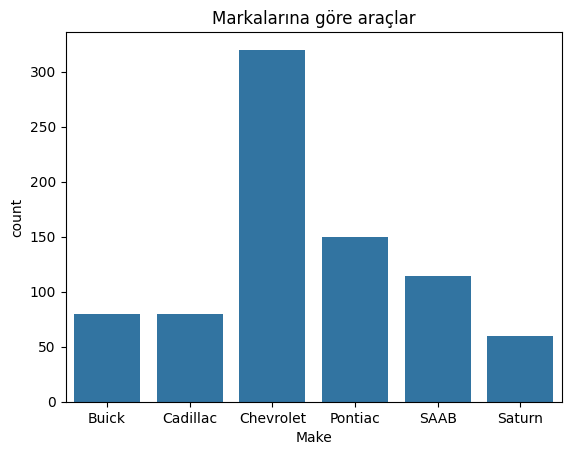

In [17]:
sns.countplot(df,x='Make');
plt.title("Markalarına göre araçlar");

In [18]:
#Veri setini hedef ve özellikler ayır
y=df['Price']
X=df.drop('Price',axis=1)

In [19]:
y

,Price
0,17314.103129
1,17542.036083
2,16218.847862
3,16336.913140
4,16339.170324
...,...
799,16507.070267
800,16175.957604
801,15731.132897
802,15118.893228


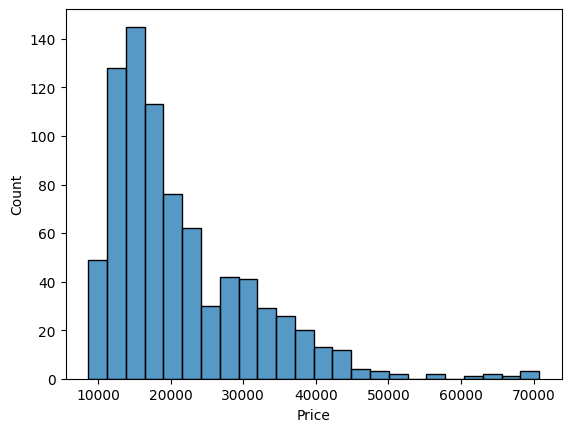

In [20]:
sns.histplot(y);

In [21]:
# Veri setinin bölünmesi
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
X_train

,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
344,20000,Chevrolet,Corvette,Conv 2D,Convertible,8,6.0,2,1,0,1
350,7054,Chevrolet,Corvette,Coupe 2D,Coupe,8,6.0,2,1,0,1
443,15903,Chevrolet,Malibu,Sedan 4D,Sedan,6,3.5,4,0,1,1
331,6709,Chevrolet,Cobalt,Sedan 4D,Sedan,4,2.2,4,1,1,1
290,13776,Chevrolet,Cobalt,Coupe 2D,Coupe,4,2.2,2,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
71,9795,Buick,Park Avenue,Special Ed Ultra 4D,Sedan,6,3.8,4,1,1,0
106,24415,Cadillac,Deville,DHS Sedan 4D,Sedan,8,4.6,4,1,1,1
270,4922,Chevrolet,Cavalier,Sedan 4D,Sedan,4,2.2,4,0,1,1
435,18721,Chevrolet,Malibu,MAXX Hback 4D,Hatchback,6,3.5,4,0,1,1


In [23]:
from sklearn.pipeline import Pipeline # iş akış standardı
from sklearn.impute import SimpleImputer #eksik veirleri tamamlama yöntemi eksik veri olsaydı
from sklearn.preprocessing import StandardScaler,OneHotEncoder  #StandardScaler veriyi ölçeklendirme için OHE ise kategorik veriyi saıyya çevirmek için
from sklearn.compose import ColumnTransformer #sütunları dönüştürüyor

In [27]:
#önişleyici
cat_feat=['Make','Model','Trim','Type']
num_feat=['Mileage','Cylinder','Liter','Doors']
preprocessor=ColumnTransformer(transformers=[('num',
                Pipeline(steps=[('imputer',
                SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())]),
                num_feat),
                ('cat',OneHotEncoder(handle_unknown='ignore'),
                 cat_feat)])

Preprocessing steps that can be included in a `ColumnTransformer`:

*   **Handling Categorical Features:**
    *   `OneHotEncoder`: Converts categorical variables into a one-hot encoded numerical representation. (Already used in your notebook)
    *   `OrdinalEncoder`: Encodes categorical features as an integer array. Useful for ordinal categories.
*   **Handling Numerical Features:**
    *   `MinMaxScaler`: Scales features to a given range, often between 0 and 1.
    *   `RobustScaler`: Scales features using statistics that are robust to outliers.
    *   `PowerTransformer`: Applies a power transform featurewise to make data more Gaussian-like.
    *   `QuantileTransformer`: Transforms features using quantiles information to make the data follow a uniform or normal distribution.
*   **Handling Missing Values:**
    *   `SimpleImputer`: Fills missing values using a simple strategy like mean, median, mode, or a constant value. (Already used in your notebook)
    *   `KNNImputer`: Imputes missing values using the k-Nearest Neighbors approach.
*   **Feature Engineering:**
    *   Custom transformers: You can create your own custom transformers to perform specific feature engineering tasks like creating polynomial features, interaction terms, or applying domain-specific transformations.
*   **Dimensionality Reduction:**
    *   `PCA`: Principal Component Analysis for linear dimensionality reduction.
    *   `TruncatedSVD`: Similar to PCA but works well with sparse data.

You can combine these transformers within pipelines for numerical and categorical features as you have already done in your `ColumnTransformer`.

In [28]:
# Modelin Seçilmesi ve Eğitilmesi
# Modelin Seçimi ve iş akış hattının tanımlanması

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
lr_model=LinearRegression()
dt_model=DecisionTreeRegressor()
rf_model=RandomForestRegressor()
knn_model=KNeighborsRegressor()

pipe=Pipeline(steps=[('preprocessor',preprocessor),
                    ('model',lr_model)])

In [29]:
pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Mileage', 'Cylinder',
                                                   'Liter', 'Doors']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Make', 'Model', 'Trim',
                                                   'Type'])])),
                ('model', LinearRegression())])

In [30]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Mileage', 'Cylinder',
                                                   'Liter', 'Doors']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Make', 'Model', 'Trim',
                                                   'Type'])])),
                ('model', LinearRegression())])

In [31]:
# Modelin Değerlendirilmesi
y_predict=pipe.predict(X_test)

In [32]:
y_predict

array([11959.08312251, 29589.07431673,  9696.93012894, 20806.52500209,
       14920.82224639, 10663.27992861, 28362.10076621, 13965.06448093,
        7838.58346443, 26858.48273137, 22375.3585722 , 25920.19540851,
       12501.18315789, 16258.57346316, 14784.50225941, 16946.63314633,
       16159.00009816, 36498.33847592, 12998.08857408, 15111.91071272,
       34643.13498523, 22270.13893527, 16813.85933895, 15886.68924846,
       20889.08768372, 23495.00860252, 26364.9814213 , 15248.37041515,
        8388.2646613 , 23662.6761753 , 27270.03464344, 18301.27940826,
       12187.18387959, 15643.05950232, 17168.78896761, 22009.90729697,
       11584.27330443, 17178.22212269, 22962.78798904, 13738.41527241,
       22553.53799302, 29936.75124616, 27660.85279691, 36944.46287307,
       11765.64119909, 12681.87523686, 16226.37610062, 22076.85921268,
       16786.41495417, 19118.97691058, 22047.38467037, 19263.25713312,
        8209.06276477, 36850.11781806, 17502.66202084, 13381.38097831,
      

In [33]:
y_test

,Price
192,11302.902985
717,29114.544506
168,10777.052537
522,20677.593819
536,15253.868566
...,...
658,29142.714386
356,35575.417049
525,18042.221074
748,14881.955446


In [34]:
final_test=pd.DataFrame({'y_test':y_test,'y_predict':y_predict})

In [35]:
final_test

,y_test,y_predict
192,11302.902985,11959.083123
717,29114.544506,29589.074317
168,10777.052537,9696.930129
522,20677.593819,20806.525002
536,15253.868566,14920.822246
...,...,...
658,29142.714386,30090.923334
356,35575.417049,35720.279079
525,18042.221074,18837.548623
748,14881.955446,15709.342001


In [41]:
import math
final_test['Err']=abs(final_test['y_test']-final_test['y_predict']) # hata gerçeklikten uzaklıktır

In [42]:
final_test

,y_test,y_predict,Err
192,11302.902985,11959.083123,656.180137
717,29114.544506,29589.074317,474.529811
168,10777.052537,9696.930129,1080.122408
522,20677.593819,20806.525002,128.931183
536,15253.868566,14920.822246,333.046320
...,...,...,...
658,29142.714386,30090.923334,948.208949
356,35575.417049,35720.279079,144.862031
525,18042.221074,18837.548623,795.327549
748,14881.955446,15709.342001,827.386555


In [45]:
#metrikler var
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("Modeli R2 değeri: ",r2_score(y_test,y_predict))
print("Modeli MSE değeri: ",mean_squared_error(y_test,y_predict)**.5)

Modeli R2 değeri:  0.9912072687898575
Modeli MSE değeri:  835.1013862206736


**R² (Belirlilik Katsayısı):** 0.9912: Bu değer, modelinizin bağımlı değişkendeki (Price - Fiyat) varyansın %99.12'sini açıklayabildiği anlamına gelir. 1'e çok yakın olması, modelinizin veriye çok iyi uyduğunu ve fiyat tahminlerinizin büyük ölçüde doğru olduğunu gösterir.


**RMSE (Ortalama HAta Kareleri Karekökü):** 835.10: Bu değer, modelinizin tahminlerinin gerçek fiyatlardan ortalama olarak ne kadar saptığını gösterir. Karekökü alındığı için birim olarak fiyat birimiyle aynıdır (burada dolar veya veri setinde kullanılan para birimi). 835.10 gibi düşük bir RMSE değeri, tahminlerinizin gerçek değerlere oldukça yakın olduğunu gösterir.

In [46]:
df.Price.min(), df.Price.max(),

(8638.930895260657, 70755.46671654288)

In [51]:
import pickle
pickle.dump(pipe,open(r"/content/drive/MyDrive/YZ Eğitimleri/YZECS11-25/pipe.pkl", 'wb'))